## Disease Diagnose Prediction

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       

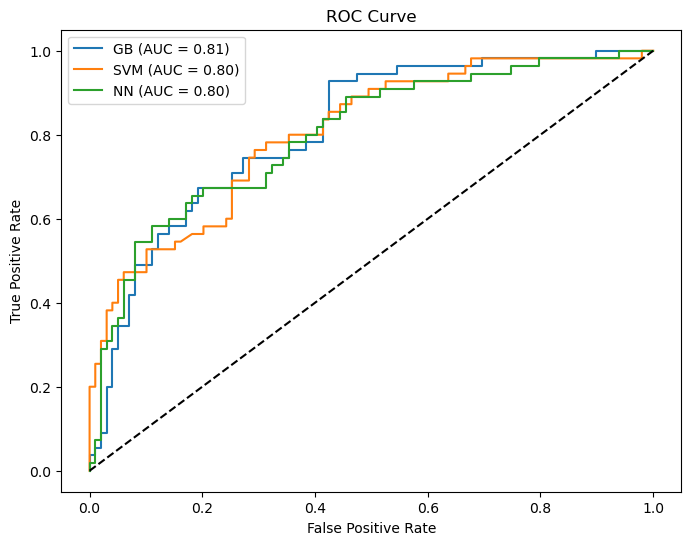

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load Data
data = pd.read_csv("diabetes.csv")  # Or heart disease dataset
print(data.head())

# 2. Preprocess Data
# Handle missing values (if any - often, you'll need domain knowledge here)
data = data.dropna()

# Separate features and target
X = data.drop("Outcome", axis=1) # Replace "Outcome" with your target column name
y = data["Outcome"]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Models
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42, probability=True) # probability=True for AUC-ROC
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# 4. Evaluate Models
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("Neural Network Classification Report:\n", classification_report(y_test, nn_predictions))

# AUC-ROC Curve
plt.figure(figsize=(8, 6))

# Gradient Boosting
fpr, tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'GB (AUC = {auc:.2f})')

# SVM
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')

# Neural Network
fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'NN (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()